In [5]:
import pandas as pd
import numpy as np
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#!pip install openpyxl==3.1.0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# **Data Cleaning**

In [17]:
df.shape


(541909, 8)

In [19]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [23]:
df.replace("", pd.NA, inplace=True)
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [27]:
df = df.dropna()
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [38]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [40]:
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [44]:
df = df[df["Quantity"] > 0]
df = df[df["UnitPrice"] > 0]

In [46]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

## **Data Preparation for RFM Analysis**

In [50]:
#converting the InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [52]:
# Set a reference date for recency calculation (most recent date in the dataset)
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

In [54]:
# Aggregate data by CustomerID
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'TotalPrice': 'sum'  # Monetary
})

In [56]:
# Rename columns for clarity
rfm.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'TotalPrice': 'Monetary'}, inplace=True)


In [58]:
# Display the RFM DataFrame
print(rfm.head())

            Recency  Frequency  Monetary
CustomerID                              
12346.0         326          1  77183.60
12347.0           2        182   4310.00
12348.0          75         31   1797.24
12349.0          19         73   1757.55
12350.0         310         17    334.40


## **Performing RFM Segmentation**

In [61]:
# Create RFM quartiles (or use any other method you prefer)
rfm['RecencyScore'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['FrequencyScore'] = pd.qcut(rfm['Frequency'], 4, labels=[1, 2, 3, 4])
rfm['MonetaryScore'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# Combine the individual scores into a single RFM score
rfm['RFM_Score'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str) + rfm['MonetaryScore'].astype(str)

# Define customer segments based on RFM score
def rfm_segment(df):
    if df['RFM_Score'] == '444':
        return 'Champions'
    elif df['RFM_Score'] == '311':
        return 'Loyal'
    elif df['RFM_Score'] == '223':
        return 'At-Risk'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(rfm_segment, axis=1)

# Display RFM segmentation
print(rfm.head())


            Recency  Frequency  Monetary RecencyScore FrequencyScore  \
CustomerID                                                             
12346.0         326          1  77183.60            1              1   
12347.0           2        182   4310.00            4              4   
12348.0          75         31   1797.24            2              2   
12349.0          19         73   1757.55            3              3   
12350.0         310         17    334.40            1              1   

           MonetaryScore RFM_Score    Segment  
CustomerID                                     
12346.0                4       114     Others  
12347.0                4       444  Champions  
12348.0                4       224     Others  
12349.0                4       334     Others  
12350.0                2       112     Others  


## **Sales Analysis and Visualization**

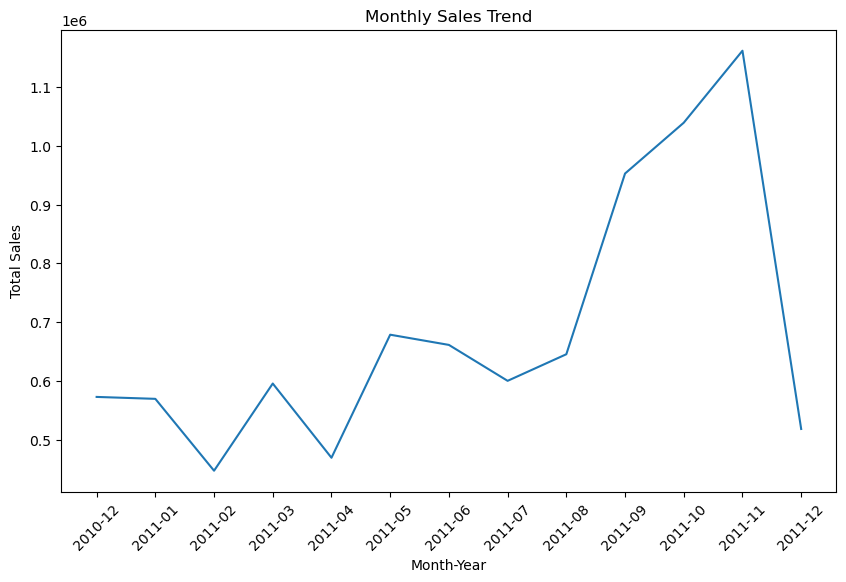

Average Transaction Value: TotalPrice    480.865956
dtype: float64


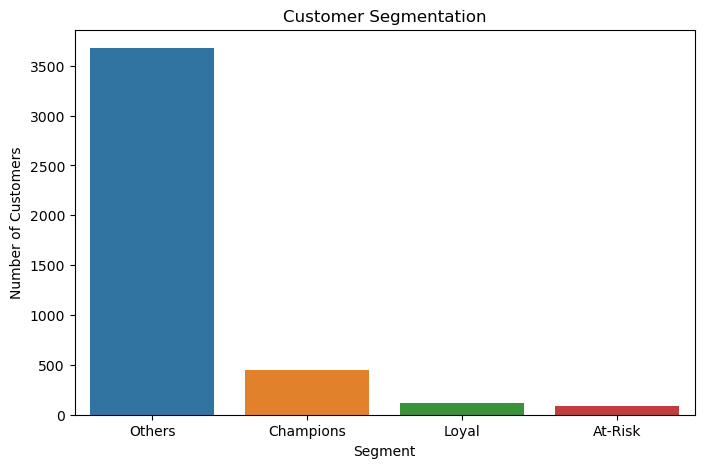

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress the specific FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Extract Month-Year from InvoiceDate
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')

# Monthly sales analysis (Total Quantity sold per month)
monthly_sales = df.groupby('MonthYear').agg({'TotalPrice': 'sum'}).reset_index()
# Convert 'MonthYear' to string format (YYYY-MM)
monthly_sales['MonthYear'] = monthly_sales['MonthYear'].astype(str)
# Plot monthly sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='MonthYear', y='TotalPrice')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Calculate Average Transaction Value
avg_transaction_value = df.groupby('InvoiceNo').agg({'TotalPrice': 'sum'}).mean()
print(f'Average Transaction Value: {avg_transaction_value}')

# Visualize Customer Segmentation
segment_counts = rfm['Segment'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.title('Customer Segmentation')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.show()


In [92]:
# High-Value Customers (Champions)
champions = rfm[rfm['Segment'] == 'Champions']
print(f'Number of Champions: {champions.shape[0]}')
print(f'Total Monetary Value of Champions: {champions["Monetary"].sum()}')

# At-Risk Customers
at_risk = rfm[rfm['Segment'] == 'At-Risk']
print(f'Number of At-Risk Customers: {at_risk.shape[0]}')
print(f'Total Monetary Value of At-Risk Customers: {at_risk["Monetary"].sum()}')

# Suggest Retargeting Strategies for At-Risk Customers
print("Consider offering discounts or promotions to At-Risk customers to re-engage them.")

# Monthly Sales Insights
sales_peak = monthly_sales[monthly_sales['TotalPrice'] == monthly_sales['TotalPrice'].max()]
print(f'Peak Sales Month: {sales_peak["MonthYear"].values[0]}')


Number of Champions: 447
Total Monetary Value of Champions: 4165685.9600000004
Number of At-Risk Customers: 91
Total Monetary Value of At-Risk Customers: 89280.59999999999
Consider offering discounts or promotions to At-Risk customers to re-engage them.
Peak Sales Month: 2011-11
